## Lab 2 Template

zID: z5392319

Name: Yifei Yue

Below we provide sample code for the SIFT detector using SIFT_create() function from opencv_contrib package

In [277]:
import math
import numpy as np
import sys

import cv2
import matplotlib.pyplot as plt

In [278]:
class SiftDetector():
    def __init__(self, norm="L2", params=None):
        self.detector=self.get_detector(params)
        self.norm=norm

    def get_detector(self, params):
        if params is None:
            params={}
            params["n_features"]=0
            params["n_octave_layers"]=3
            params["contrast_threshold"]=0.03
            params["edge_threshold"]=10
            params["sigma"]=1.6

        detector = cv2.SIFT_create(
                nfeatures=params["n_features"],
                nOctaveLayers=params["n_octave_layers"],
                contrastThreshold=params["contrast_threshold"],
                edgeThreshold=params["edge_threshold"],
                sigma=params["sigma"])

        return detector

In [279]:
# Function to rotate an input image
# parameters:
            # image: image to rotate
            # x: x-coordinate of point we wish to rotate around
            # y: y-coordinate of point we wish to rotate around
            # angle: degrees to rotate image by
# returns: rotated copy of the original image

def rotate(image, x, y, angle):
    rot_matrix = cv2.getRotationMatrix2D((x, y), angle, 1.0)
    h, w = image.shape[:2]

    return cv2.warpAffine(image, rot_matrix, (w, h))

In [280]:
# Function to get coordinates of center point in an image
# parameter:
            # image: image that will be rotated
# returns: (x,y) coordinates of point at the centre of an image

def get_img_center(image):
    height, width = image.shape[:2]
    center = height // 2, width // 2
    return center

## Task 1: Read the given sample image "Beehive_Corner_Adelaide.png" and compute the SIFT features of the given image.
- Extract SIFT features with default parameters and show the keypoints on the image.
- To achieve better visualization of the keypoints, reduce the number of keypoints. Hint: Vary the parameter contrastThreshold or nfeatures so that the number of keypoints becomes about 10% of all default keypoints.

Number of original SIFT features:  8383


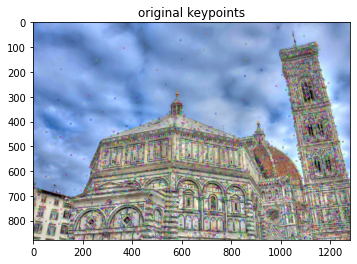

Number of reduced SIFT features:  800


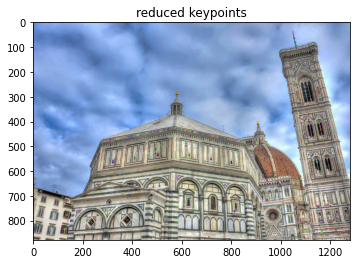

In [281]:
# Write your code here and display original image and images obtained in 1(a) and 1(b)

# convert image to gray
img = cv2.imread('Cathedral.png', 1)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

sift = SiftDetector()
detector = sift.get_detector(params=None)
# computing features
keps_a, des_a = detector.detectAndCompute(img_gray, None)
sift_img_a = cv2.drawKeypoints(img, keps_a, np.array([]))
sift_img_a = cv2.cvtColor(sift_img_a, cv2.COLOR_BGR2RGB)

print("Number of original SIFT features: ", len(keps_a))
plt.title("Original keypoints")
plt.imshow(sift_img_a)
cv2.imwrite('task1_a.png', cv2.cvtColor(sift_img_a, cv2.COLOR_RGB2BGR))
plt.show()

# Parameters for SIFT initializations such that we find only 10% of keypoints
params_less = {
    'n_features': 800,
    'n_octave_layers': 3,
    'contrast_threshold': 0.155,  # updated threshold.This value will vary for different images to view 10% of keypoints.
    'edge_threshold': 10,
    'sigma': 1.6
}

sift = SiftDetector(params=params_less)

keps_1b, des_1b = sift.detector.detectAndCompute(img_gray, None)
sift_img_b = cv2.drawKeypoints(image, keps_1b, np.array([]))
sift_img_b = cv2.cvtColor(sift_img_b, cv2.COLOR_BGR2RGB)

print("Number of reduced SIFT features: ", len(keps_1b))
plt.title("Reduced keypoints")
plt.imshow(sift_img_b)
cv2.imwrite('task1_b.png', cv2.cvtColor(sift_img_b, cv2.COLOR_RGB2BGR))
plt.show()

### Brief description of the appproach used for b

In order to reduce the number of keypoints, SIFT features are extracted from the gray image of the input image. We can find that there are 8383 keypoints. Then we set n_features to 800 to ensure that only 800 keypoints are reserved and contrast_threshold to 0.155 to remove some points with low contrast ratio. Finally, by modifying these two parameters, we reduced the number of keypoints to approximately 10% of all default keypoints.

## Task 2: Change the scale of the image and recompute the SIFT features.
- Enlarge the given image by a scale percentage of 120.
- Extract the SIFT features and show the keypoints on the scaled image using the same parameter setting as for Task 1 (for the reduced number of keypoints).
- Inspect the keypoints visually: Are the keypoints of the scaled image roughly the same as those of the original image? What does this observation imply?
- Match the SIFT descriptors of the keypoints of the scaled image with those of the original image using the nearest-neighbour distance ratio method. Show the keypoints of the 5 best-matching descriptors on both the original and the scaled image. Hint: Brute-force matching is available in OpenCV for feature matching.


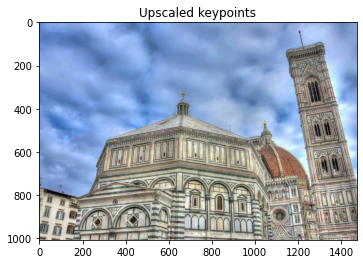

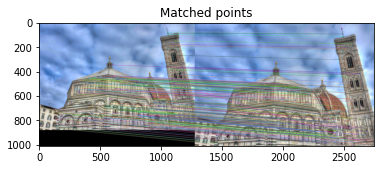

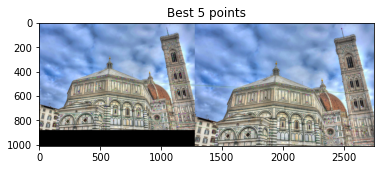

In [282]:
# enlarge the given image with a scaling factor of 115%
height = int(img.shape[0] * 1.15)
width = int(img.shape[1] * 1.15)

# resize image
img_resized = cv2.resize(img, (width, height), interpolation=cv2.INTER_AREA)
img_gray_resized = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

# Compute SIFT features for rescaled image
keps_2b, des_2b = sift.detector.detectAndCompute(img_gray_resized, None)
sift_img_2b = cv2.drawKeypoints(img_resized, keps_2b, np.array([]))
sift_img_2b = cv2.cvtColor(sift_img_2b, cv2.COLOR_BGR2RGB)

plt.title("Keypoints on the scaled image")
plt.imshow(sift_img_2b)
cv2.imwrite('task2_b.png', cv2.cvtColor(sift_img_2b, cv2.COLOR_RGB2BGR))
plt.show()

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des_1b, des_2b, k=2)

# matched points
good_point = []
for m, n in matches:
    if m.distance < 0.8 * n.distance:
        good_point.append([m])

# draw matches
result = cv2.drawMatchesKnn(
    sift_img_b, keps_1b,
    sift_img_2b, keps_2b,
    good_point, None, flags=2)

plt.title("Matched points")
plt.imshow(result)
plt.show()

# show best 5 keypoints
distance = []
for kp in good_point:
    distance.append((kp[0].distance))
    distance.sort(reverse=True)

best = []
for j in good_point:
    if j[0].distance in distance[0:5]:
        best.append(j)

result_best = cv2.drawMatchesKnn(
    sift_img_b, keps_1b,
    sift_img_2b, keps_2b,
    best, None, flags=2)

plt.title("The keypoints of the 5 best-matching descriptors")
plt.imshow(result_best)
cv2.imwrite('task2_d.png', cv2.cvtColor(result_best, cv2.COLOR_RGB2BGR))
plt.show()

### c)

Inspect the keypoints visually, the keypoints of the rotated image roughly the same as those of the origianl image, which implies that the SIFT features are scale invariant.

## Task 3: Rotate the image and recompute the SIFT features.
- Rotate the given image anticlockwise by 60 degrees.
- Extract the SIFT features and show the keypoints on the rotated image using the same parameter setting as for Task 1 (for the reduced number of keypoints).
- Inspect the keypoints visually: Are the keypoints of the rotated image roughly the same as those of the original image? What does this observation imply?
- Match the SIFT descriptors of the keypoints of the rotated image with those of the original image using the nearest-neighbour distance ratio method. Show the keypoints of the 5 best-matching descriptors on both the original and the rotated image.

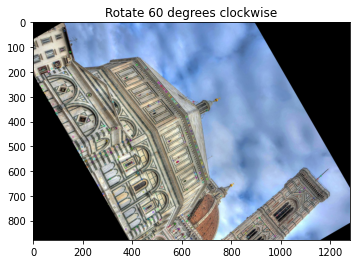

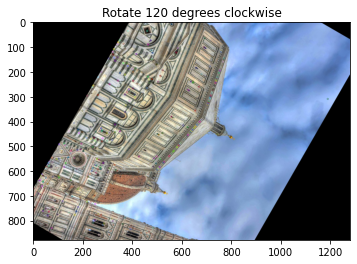

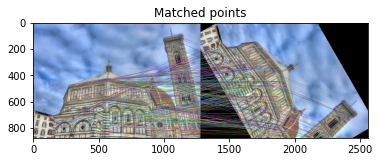

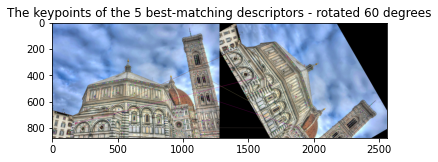

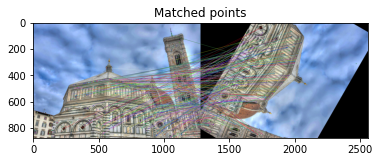

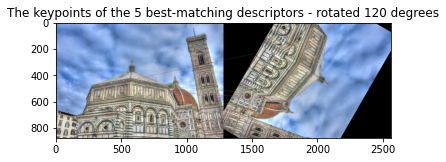

In [283]:
# Write your code here and display images obtained in 3(b) and 3(d). Also, write your answer to 3(c) in a new cell.
# 旋转不变性

# center of image points. 'img_center' is in (Y, X) order.
img_center = get_img_center(img)

# rotate the given image clockwise by 60 degrees
angle = -60
rotate_60_img = rotate(img, img_center[1], img_center[0], angle)
rotate_60_img_gray = cv2.cvtColor(rotate_60_img, cv2.COLOR_BGR2GRAY)

# rotate the given image clockwise by 120 degrees
angle = -120
rotate_120_img = rotate(img, img_center[1], img_center[0], angle)
rotate_120_img_gray = cv2.cvtColor(rotate_120_img, cv2.COLOR_BGR2GRAY)

# compute SIFT features for rescaled images
keps_60, des_60 = sift.detector.detectAndCompute(rotate_60_img_gray, None)
sift_img_60 = cv2.drawKeypoints(rotate_60_img, keps_60, np.array([]))
sift_img_60 = cv2.cvtColor(sift_img_60, cv2.COLOR_BGR2RGB)

keps_120, des_120 = sift.detector.detectAndCompute(rotate_120_img_gray, None)
sift_img_120 = cv2.drawKeypoints(rotate_120_img, keps_120, np.array([]))
sift_img_120 = cv2.cvtColor(sift_img_120, cv2.COLOR_BGR2RGB)

# show images
plt.title("Rotate 60 degrees clockwise")
plt.imshow(sift_img_60)
cv2.imwrite('task3_b_60.png', cv2.cvtColor(sift_img_60, cv2.COLOR_RGB2BGR))
plt.show()

plt.title("Rotate 120 degrees clockwise")
plt.imshow(sift_img_120)
cv2.imwrite('task3_b_120.png', cv2.cvtColor(sift_img_120, cv2.COLOR_RGB2BGR))
plt.show()


# rotate 60 degrees clockwise
bf = cv2.BFMatcher()
matches = bf.knnMatch(des_1b, des_60, k=2)

# matched points
good_point = []
for m, n in matches:
    if m.distance < 0.8 * n.distance:
        good_point.append([m])

# draw matches
result = cv2.drawMatchesKnn(
    sift_img_b, keps_1b,
    sift_img_60, keps_60,
    good_point, None, flags=2)

plt.title("Matched points")
plt.imshow(result)
plt.show()

# get best 5 keypoints
distance = []
for kp in good_point:
    distance.append((kp[0].distance))
    distance.sort(reverse=True)

best = []
for j in good_point:
    if j[0].distance in distance[0:6]:
        best.append(j)

result_best = cv2.drawMatchesKnn(
    sift_img_b, keps_1b,
    sift_img_60, keps_60,
    best, None, flags=2)

plt.title("The keypoints of the 5 best-matching descriptors - rotated 60 degrees")
plt.imshow(result_best)
cv2.imwrite('task3_d_60.png', cv2.cvtColor(result_best, cv2.COLOR_RGB2BGR))
plt.show()


# rotate 120 degrees clockwise
bf = cv2.BFMatcher()
matches = bf.knnMatch(des_1b, des_120, k=2)

# matched points
good_point = []
for m, n in matches:
    if m.distance < 0.8 * n.distance:
        good_point.append([m])

# draw matches
result = cv2.drawMatchesKnn(
    sift_img_b, keps_1b,
    sift_img_120, keps_120,
    good_point, None, flags=2)

plt.title("Matched points")
plt.imshow(result)
plt.show()

# get best 5 keypoints
distance = []
for kp in good_point:
    distance.append((kp[0].distance))
    distance.sort(reverse=True)

best = []
for j in good_point:
    if j[0].distance in distance[0:5]:
        best.append(j)

result_best = cv2.drawMatchesKnn(
    sift_img_b, keps_1b,
    sift_img_120, keps_120,
    best, None, flags=2)

plt.title("The keypoints of the 5 best-matching descriptors - rotated 120 degrees")
plt.imshow(result_best)
cv2.imwrite('task3_d_120.png', cv2.cvtColor(result_best, cv2.COLOR_RGB2BGR))
plt.show()

### c)

Inspect the keypoints visually, the keypoints of the rotated image roughly the same as those of the origianl image, which implies that the SIFT features are rotation invariant.